# <font color="blue">DA514 - Homework Assignment 2</font>

Assigned: February 24th, 2021<br>
Due: **March 7th, 2021 23:55pm**

Please use this notebook for your answers. Add your charts/graphs/code where necessary. You can select the "Markdown" mode from the drop-down menu above and type your answer/reasoning there. It would be extra nice if you can use equations. The notebooks we provided have numerous examples. you can also check the following link for the Markdown formula: http://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/

### Requirements (very important):
1. Please use **this notebook** to answer the questions. If you work on Colab, you can download your notebook and use it for submission.


2. Please name your notebook as **`lastName_firstName_HW2.ipynb`** and upload it to SuCourse+ on time.


3. Don't send your work in HTML format. Because we must be able to run your code if need be. Don't send it in the **`.py`** format either. They won't be processed.  


4. Please work alone.

### Fatma Betül Özgün Homework 2

# Q1. Cross Validation and the mean model performance (30 pts)
Cross-validation gives a measure of out-of-sample accuracy by averaging over several random partitions of test samples. It is often used for parameter tuning by doing cross-validation for several possible values of a parameter and choosing the parameter value that gives the lowest cross-validation average error. So you can use CV to help choose between alternatives.

The point is, you can use one validation step only for one goal: either for parameter optimization, or for estimating generalization performance. When you use cross validation for parameter tuning, the validation samples in fact become part of your model. So you need another independent (test) sample to correctly assess the performance of the final model. When we have limited data, we may not have that independent data set to measure the generalization performance of the model.

When only a limited data is available, we use a k-fold CV and report the mean performance across all folds. With a single random partitioning of data, the result could be noisy meaning that each time the CV procedure is run, a different split of the dataset into k-folds can be implemented, and in turn, the distribution of performance scores can be different, resulting in a different mean estimate of model performance.

One alternative might be to use repeated cross validations. This way, we can have a more reliable estimate for the mean performance of the model as the repeated CV estimator outperforms the non-repeated one by reducing the variability of the estimator.

We would like to measure the mean performance of the default Logistic Regression and kNN models on the Iris data set. 

**1.** Fit the default **Logistic Regression** and **kNN** models by training on the whole data using a single 5-fold CV procedure and report the mean performance and the standard error. 

**2.** Now employ a **repeated** 5-fold CV procedure (say 50-100 repetitions) for both models to measure the overall mean performance and the standard error.

What differences do you see? You may want to plot the variation in the mean performance and the standard error as a function of the number of repetitions and comment. 

In [981]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, RepeatedKFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_auc_score, precision_recall_curve
from sklearn.metrics import f1_score, fbeta_score, accuracy_score, classification_report, average_precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import OrdinalEncoder
import scipy.stats as stats 
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [980]:
print('betül') 

betül


In [982]:
# load the iris data into a DataFrame from its URL
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data' 
df = pd.read_csv(url)
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [983]:
#Specify the column names
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(url, header=None, names=col_names)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [946]:
df.shape

(150, 5)

In [947]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [948]:
df.isnull().values.any()

False

#### Answer 1.1 

## Single k-fold Cross Validation

## a- Building Logistic Regression Model

### With Default Parameters 

In [949]:
df2= df.copy()
y = df2.species
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] 
X = df2[columns]

In [950]:
seed = 150
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

In [951]:
#Building the model 
log_reg = LogisticRegression() 
log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)
print( 'Test accuracy :', (accuracy_score(y_test, log_reg.predict(X_test))))
scores = cross_val_score(log_reg, X_test, y_test, cv=5)

Test accuracy : 0.9473684210526315


In [952]:
#Finding the mean performance and the standard error for logistic regression with default parameters 
print("Mean with default parameters is equal to:",scores.mean())
print("Standard error with default parameters is equal to:", stats.sem(scores))

Mean with default parameters is equal to: 0.9464285714285714
Standard error with default parameters is equal to: 0.03292694449033175


### With Hyperparameters 

In [513]:
#Searching best grid parameters 
pipe = Pipeline([('scaler',  StandardScaler()),
                ('clf',     LogisticRegression(random_state=seed))])

params = [{'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga']},
          
          {'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l2'], 
           'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}]

grid = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=-1 , verbose=1)
grid.fit(X_train, y_train)

print('Best grid parameters:', grid.best_params_, '\n')
print('Classifier used     :',grid.best_estimator_,'\n')

Fitting 5 folds for each of 266 candidates, totalling 1330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.6s


Best grid parameters: {'clf__C': 0.40000000000000013, 'clf__penalty': 'l1', 'clf__solver': 'saga'} 

Classifier used     : Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(C=0.40000000000000013, penalty='l1',
                                    random_state=150, solver='saga'))]) 



[Parallel(n_jobs=-1)]: Done 1330 out of 1330 | elapsed:   30.9s finished


In [786]:
log_reg_hyp = LogisticRegression(C = 0.4, solver='saga', penalty='l1') 
scores_hyp = cross_val_score(log_reg_hyp, X_test, y_test, cv=5) 

In [787]:
#Finding the mean performance and the standard error for logistic regression with hyperparameters
print("Mean with hyperparameters is equal to:",scores_hyp.mean())
print("Standard error with hyperparameters is equal to:",stats.sem(scores_hyp))

Mean with hyperparameters is equal to: 0.8964285714285714
Standard error with hyperparameters is equal to: 0.04738035414793428


Note 1: Mean and standard error values change when we build the model with hyperparameters. 

## b- Building kNN Model

### With Default Parameters

In [792]:
df3= df.copy()
y = df3.species
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] 
X = df3[columns]

In [793]:
seed = 150
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

In [794]:
# We should scale the data in kNN 
scalerX = StandardScaler().fit(X_train)
X_train = scalerX.transform(X_train)
X_test = scalerX.transform(X_test)

In [795]:
#Building the model 
knn_clf = KNeighborsClassifier(n_neighbors = 5)
knn_clf.fit(X_train, y_train)
predictions = knn_clf.predict(X_test)
print( 'Test accuracy :', (accuracy_score(y_test, knn_clf.predict(X_test))))
knn_scores = cross_val_score(knn_clf, X_test, y_test, cv=5)

Test accuracy : 0.9473684210526315


In [796]:
#Finding the mean performance and the standard error for kNN with default parameters 
print("Mean with default parameters is equal to:",knn_scores.mean())
print("Standard error with default parameters is equal to:",stats.sem(knn_scores))

Mean with default parameters is equal to: 0.9214285714285714
Standard error with default parameters is equal to: 0.05101020306102036


### With Hyperparameters

In [530]:
#Searching best grid parameters 
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('clf', KNeighborsClassifier()) ])

params = [{'clf__n_neighbors': np.arange(1, 30, 2), 
           'clf__weights'    : ['uniform', 'distance'], 
           'clf__p'          : [1, 2]} ] 

grid = GridSearchCV(estimator = pipeline, param_grid = params, cv = 5,  n_jobs=-1 , verbose=1)

grid.fit(X_train, y_train)
print('Best grid parameters:', grid.best_params_, '\n')
print('Classifier used:', grid.best_estimator_,'\n')

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s


Best grid parameters: {'clf__n_neighbors': 7, 'clf__p': 2, 'clf__weights': 'uniform'} 

Classifier used: Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=7))]) 



[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    5.2s finished


In [798]:
knn_clf_hyp = KNeighborsClassifier(n_neighbors = 7, weights='uniform', p= 2)
knn_scores_hyp = cross_val_score(knn_clf_hyp, X_test, y_test, cv=5)

In [799]:
#Finding the mean performance and the standard error for kNN with hyperparameters
print("Mean with hyperparameters is equal to:",knn_scores_hyp.mean())
print("Standard error with hyperparameters is equal to:",stats.sem(knn_scores_hyp))

Mean with hyperparameters is equal to: 0.9214285714285714
Standard error with hyperparameters is equal to: 0.05101020306102036


Note 2: Mean and standard error values does not change when we build the model with hyperparameters.

#### Answer 3.2

## 2- Repeated k-fold Cross Validation

## a- Building Logistic Regression Model

### With Default Parameters

In [953]:
df4= df.copy()
y = df4.species
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] 
X = df4[columns]

In [954]:
seed = 150
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

In [955]:
#Building the Model 
kfold = RepeatedKFold(n_splits=5, n_repeats=50, random_state=seed)
log_reg_rep = LogisticRegression()
log_reg_rep.fit(X_train, y_train)
predictions = log_reg_rep.predict(X_test)
print( 'Test accuracy :', (accuracy_score(y_test, log_reg_rep.predict(X_test))))
scores_rep = cross_val_score(log_reg_rep, X_test, y_test, cv = kfold)

Test accuracy : 0.9473684210526315


In [956]:
#Finding the mean and the standard error for logistic regression-repeated and default parameters
print("Mean with default parameters is equal to:",scores_rep.mean())
print("Standard error with default parameters is equal to:",stats.sem(scores_rep))

Mean with default parameters is equal to: 0.9559285714285716
Standard error with default parameters is equal to: 0.005111375322943178


### With Hyperparameters

In [957]:
pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('classifier', LogisticRegression(random_state=seed))])

params = [{'classifier__C'      : np.arange(0.1, 1, 0.05), 
           'classifier__penalty': ['l1'], 
           'classifier__solver' : ['liblinear', 'saga']},
          
          {'classifier__C'      : np.arange(0.1, 1, 0.05), 
           'classifier__penalty': ['l2'], 
           'classifier__solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}
         ]
kfold = RepeatedKFold(n_splits=5, n_repeats=50, random_state=seed)

grid_repeated = GridSearchCV(pipe, param_grid=params, cv=kfold, verbose=1, n_jobs=-1)
grid_repeated.fit(X_train, y_train)

print('Best grid parameters:', grid_repeated.best_params_, '\n')
print('Classifier used     :',grid_repeated.best_estimator_,'\n')

Fitting 250 folds for each of 126 candidates, totalling 31500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 5560 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 10104 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 13704 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 18104 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 23304 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 29304 tasks      | elapsed:  3.1min


Best grid parameters: {'classifier__C': 0.9500000000000003, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'} 

Classifier used     : Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=0.9500000000000003, random_state=150,
                                    solver='newton-cg'))]) 



[Parallel(n_jobs=-1)]: Done 31500 out of 31500 | elapsed:  3.4min finished


In [958]:
kfold = RepeatedKFold(n_splits=5, n_repeats=50, random_state=seed)
log_reg_reph = LogisticRegression(C = 0.95, solver='newton-cg',penalty='l2') 
scores_reph = cross_val_score(log_reg_reph, X_test, y_test, cv = kfold)

In [959]:
#Finding the mean and the standard error for logistic regression-repeated and hyperparameters 
print("Mean with hyperparameters is equal to:",scores_reph.mean())
print("Standard error with hyperparameters is equal to:",stats.sem(scores_reph))

Mean with hyperparameters is equal to: 0.9554285714285715
Standard error with hyperparameters is equal to: 0.005118511893407163


Note 3: When we build the model with hyperparameters, mean and standard error values change. Moreover, if it is compared to single cross validation, values change with repeated k-fold cross-validation. This changing also shows that our model is not constant.Moreover, repeated k-fold cross validation not only changes mean and standard error but also changes hyperparameters.

## b- Building kNN Model

### With Default Parameters

In [960]:
df5= df.copy()
y = df5.species
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] 
X = df5[columns]

In [961]:
seed = 150
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

In [962]:
# We should scale the data in kNN 
scalerX = StandardScaler().fit(X_train)
X_train = scalerX.transform(X_train)
X_test = scalerX.transform(X_test)

In [963]:
kfold = RepeatedKFold(n_splits=5, n_repeats=50, random_state=seed)
knn_clf_rep = KNeighborsClassifier(n_neighbors = 5)
knn_clf_rep.fit(X_train, y_train)
predictions = knn_clf_rep.predict(X_test)
print( 'Test accuracy :', (accuracy_score(y_test, knn_clf_rep.predict(X_test))))
knn_scores_rep = cross_val_score(knn_clf_rep, X_test, y_test, cv= kfold)

Test accuracy : 0.9473684210526315


In [964]:
#Finding the mean and the standard error for kNN-repeated and default parameters 
print("Mean with default parameters is equal to:",knn_scores_rep.mean())
print("Standard error with default parameters is equal to:",stats.sem(knn_scores_rep))

Mean with default parameters is equal to: 0.9335714285714286
Standard error with default parameters is equal to: 0.005556115590710796


### With Hyperparameters

In [965]:
#Searching best grid parameters 
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('clf', KNeighborsClassifier()) ])

params = [{'clf__n_neighbors': np.arange(1, 30, 2), 
           'clf__weights'    : ['uniform', 'distance'], 
           'clf__p'          : [1, 2]} ] 

kfold = RepeatedKFold(n_splits=5, n_repeats=50, random_state=seed)
grid = GridSearchCV(estimator = pipeline, param_grid = params, cv = kfold, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

print('Best grid parameters:', grid.best_params_, '\n')
print('Classifier used:', grid.best_estimator_,'\n')

Fitting 250 folds for each of 60 candidates, totalling 15000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3824 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 11824 tasks      | elapsed:   18.4s


Best grid parameters: {'clf__n_neighbors': 11, 'clf__p': 1, 'clf__weights': 'uniform'} 

Classifier used: Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=11, p=1))]) 



[Parallel(n_jobs=-1)]: Done 15000 out of 15000 | elapsed:   23.2s finished


In [966]:
kfold = RepeatedKFold(n_splits=5, n_repeats=50, random_state=seed)
knn_clf_reph = KNeighborsClassifier(n_neighbors = 11, weights='uniform', p= 1)
knn_scores_reph = cross_val_score(knn_clf_rep, X_test, y_test, cv= kfold)

In [967]:
#Finding the mean and the standard error for kNN-repeated 
print("Mean with hyperparameters is equal to:",knn_scores_reph.mean())
print("Standard error with hyperparameters is equal to:",stats.sem(knn_scores_reph))

Mean with hyperparameters is equal to: 0.9335714285714286
Standard error with hyperparameters is equal to: 0.005556115590710796


Note 4: When we build the model with hyperparameters, mean and standard error values does not change. However, if it is compared to single k-fold cross validation, values become different with repeated k-fold cross-validation. This difference also 
shows that our model is not constant.

## Plotting Charts 

### a- Logistic Regression

In [968]:
len(scores_rep) 

250

In [969]:
#Creating 100 lists with each 5 element 
log_list = []
for e in range(0,250,5): 
    log_list.append([scores_rep[e:e+5]])

In [970]:
len(log_list)

50

In [971]:
#Finding mean of each 5 element 
mean_list=[]
for i in range(len(log_list)):
    mean_list.append(np.array(log_list[i]).mean())

In [972]:
#Finding standard deviation of each 5 element 
std_list=[]
for i in range(len(log_list)):
    std_list.append(stats.sem(np.array(log_list[i]), axis=None, ddof=0))

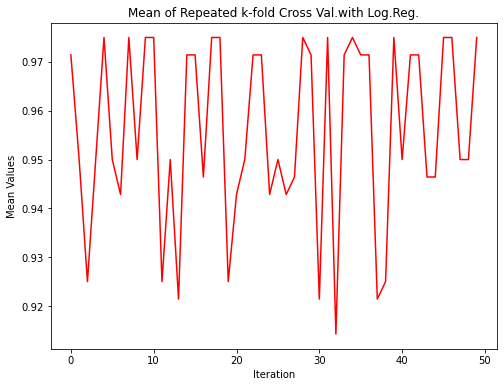

In [973]:
#Plotting Graph for Mean Values 
mean_list_graph = np.array(mean_list)
plt.figure(figsize=(8, 6))
plt.plot(mean_list_graph, color = 'red') 
plt.title('Mean of Repeated k-fold Cross Val.with Log.Reg.')
plt.xlabel('Iteration')
plt.ylabel('Mean Values')
plt.show(); 

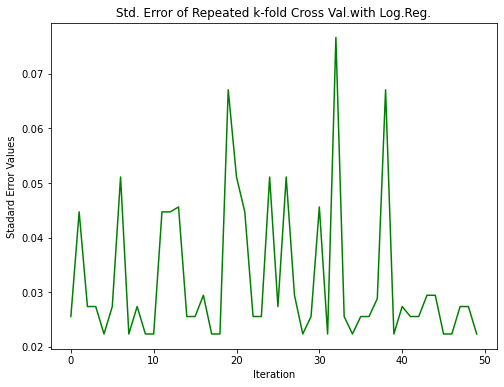

In [974]:
#Plotting Graph for Standard Error  
std_list_graph = np.array(std_list)
plt.figure(figsize=(8, 6))
plt.plot(std_list_graph, color = 'green') 
plt.title('Std. Error of Repeated k-fold Cross Val.with Log.Reg.')
plt.xlabel('Iteration')
plt.ylabel('Stadard Error Values')
plt.show(); 

Note 5: Variation of mean and standard error values decrease when the number of iterations increase from the graphs as above. 
These mean and standard error graphs prove that there is a relationship between number of repetition and model stability.When number of iteration increase, model becomes more stable and reliable.

### b- kNN

In [975]:
#Creating 100 lists with each 5 element 
knn_list = []
for e in range(0,250,5): 
    knn_list.append([knn_scores_reph[e:e+5]])

In [976]:
#Finding mean of each 5 element 
mean_knn_list=[]
for i in range(len(log_list)):
    mean_knn_list.append(np.array(knn_list[i]).mean())

In [977]:
#Finding standard deviation of each 5 element 
std_knn_list=[]
for i in range(len(log_list)):
    std_knn_list.append(stats.sem(np.array(knn_list[i]), axis=None, ddof=0))

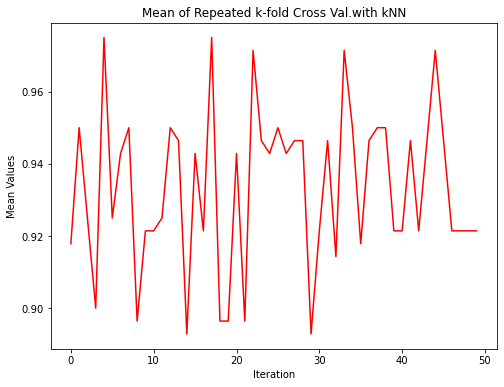

In [978]:
#Plotting Graph for Mean Values 
mean_graph_knn = np.array(mean_knn_list)
plt.figure(figsize=(8, 6))
plt.plot(mean_graph_knn, color = 'red') 
plt.title('Mean of Repeated k-fold Cross Val.with kNN')
plt.xlabel('Iteration')
plt.ylabel('Mean Values')
plt.show(); 

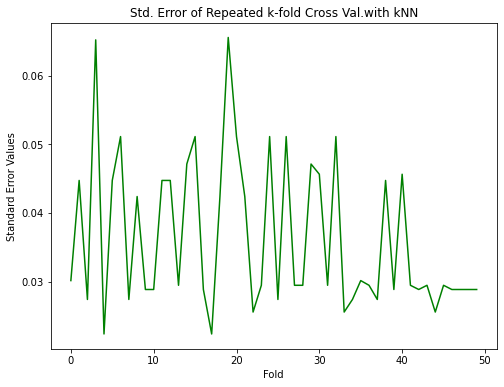

In [979]:
#Plotting Graph for Standard Error
std_graph_knn = np.array(std_knn_list)
plt.figure(figsize=(8, 6))
plt.plot(std_graph_knn, color = 'green') 
plt.title('Std. Error of Repeated k-fold Cross Val.with kNN')
plt.xlabel('Fold')
plt.ylabel('Standard Error Values')
plt.show(); 

Note 6: These mean and standard error graphs for kNN as above also show that increasing number of iterations makes model more 
stable and reliable. Fluctuation of mean and standard error decrease when the number of iterations increase.

# Q2. Are my test and train sets from the same population? (30 pts)
For answering this question, you are expected to use the data set we used for the solution of the Telco churn problem we solved in class.

Given the train (**gsmchurn_train.csv**) and test (**gsmchurn_test.csv**) data sets, you're expected to work on a classification problem for predicting churn. Having received not successful results despite all your efforts to tune the model for this specific job, you suspect that the train and test sets may not be coming from the same population. One way to check for the similarity between train and test sets could be to design a binary classification problem to shed some light on this issue.    

Imagine you mark each set (both train and test) with a special flag added as a column to these data sets indicating that they are either train or test sets. You can then combine these data sets into a single data frame and apply a classification model of your choice. If you are able to accurately classify whether the sample comes from the test or training set then the predictor variables have different underlying distributions. If not, you can safely assume that there is reasonable similarity between the train and test sets. One way to check this could be building the model and then finding the value of the probability that a randomly chosen positive example has a higher score (rank) than a randomly chosen negative example. Correct interpretation of this probability will help you come to a conclusion. 

#### Answer 2 

In [254]:
df_churn = pd.read_csv('gsmchurn_train.csv') 
df_churn.head() 

,Account_Length,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,Intl_Mins,Intl_Calls,CustServ_Calls,Churn
0,48,0,0,0,149.2,146,161.9,109,197.9,109,8.3,2,3,0
1,90,0,1,39,94.8,89,219.1,91,197.4,65,11.4,5,1,0
2,64,0,0,0,219.6,126,303.3,100,154.5,65,9.7,5,1,0
3,147,0,0,0,130.6,83,208.1,144,204.6,72,15.6,3,3,0
4,97,0,1,32,90.0,87,276.3,113,185.2,107,8.6,6,2,1


In [255]:
df_test = pd.read_csv('gsmchurn_test.csv') 
df_test.head() 

,Account_Length,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,Intl_Mins,Intl_Calls,CustServ_Calls,Churn
0,125,0,0,0,224.9,102,143.8,87,198.9,105,8.0,2,0,0
1,162,0,0,0,115.1,89,196.8,111,212.4,98,11.4,3,2,0
2,127,0,1,36,183.2,117,126.8,76,263.3,71,11.2,8,1,0
3,110,0,0,0,227.7,88,170.0,96,128.7,57,11.7,5,1,0
4,129,1,0,0,267.4,78,204.2,85,111.7,146,5.9,4,1,0


In [256]:
df_churn.shape

(2333, 14)

In [257]:
df_test.shape

(1000, 14)

In [258]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  2333 non-null   int64  
 1   Intl_Plan       2333 non-null   int64  
 2   VMail_Plan      2333 non-null   int64  
 3   VMail_Message   2333 non-null   int64  
 4   Day_Mins        2333 non-null   float64
 5   Day_Calls       2333 non-null   int64  
 6   Eve_Mins        2333 non-null   float64
 7   Eve_Calls       2333 non-null   int64  
 8   Night_Mins      2333 non-null   float64
 9   Night_Calls     2333 non-null   int64  
 10  Intl_Mins       2333 non-null   float64
 11  Intl_Calls      2333 non-null   int64  
 12  CustServ_Calls  2333 non-null   int64  
 13  Churn           2333 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 255.3 KB


In [259]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  1000 non-null   int64  
 1   Intl_Plan       1000 non-null   int64  
 2   VMail_Plan      1000 non-null   int64  
 3   VMail_Message   1000 non-null   int64  
 4   Day_Mins        1000 non-null   float64
 5   Day_Calls       1000 non-null   int64  
 6   Eve_Mins        1000 non-null   float64
 7   Eve_Calls       1000 non-null   int64  
 8   Night_Mins      1000 non-null   float64
 9   Night_Calls     1000 non-null   int64  
 10  Intl_Mins       1000 non-null   float64
 11  Intl_Calls      1000 non-null   int64  
 12  CustServ_Calls  1000 non-null   int64  
 13  Churn           1000 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 109.5 KB


In [260]:
#Creating new column for train and test data 
kpi_train_cust = [0,1]
df_churn['kpi_is_train'] =  kpi_train_cust[1]
df_test['kpi_is_train'] = kpi_train_cust[0]

In [261]:
df_churn.head()

,Account_Length,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,Intl_Mins,Intl_Calls,CustServ_Calls,Churn,kpi_is_train
0,48,0,0,0,149.2,146,161.9,109,197.9,109,8.3,2,3,0,1
1,90,0,1,39,94.8,89,219.1,91,197.4,65,11.4,5,1,0,1
2,64,0,0,0,219.6,126,303.3,100,154.5,65,9.7,5,1,0,1
3,147,0,0,0,130.6,83,208.1,144,204.6,72,15.6,3,3,0,1
4,97,0,1,32,90.0,87,276.3,113,185.2,107,8.6,6,2,1,1


In [262]:
#Appending train and test data 
df_append = df_churn.append(df_test)

In [263]:
df_append.shape

(3333, 15)

In [264]:
df_append.sample(5)

,Account_Length,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,Intl_Mins,Intl_Calls,CustServ_Calls,Churn,kpi_is_train
1935,127,1,0,0,242.2,102,226.1,80,252.0,96,13.9,5,2,1,1
1036,133,1,1,32,221.1,137,264.9,99,168.9,108,15.4,4,2,1,1
30,130,0,0,0,212.8,102,189.8,137,170.1,105,10.6,4,0,1,1
378,104,0,0,0,139.7,78,202.6,119,203.6,102,11.3,5,2,0,0
370,112,0,0,0,261.4,108,154.5,102,130.9,90,11.6,2,1,0,1


### a- Building the Model (with Logistic Regression) 

In [271]:
#Train test split 
seed = 42
train, test = model_selection.train_test_split(df_append, test_size=0.30, random_state=seed, stratify=df_append['kpi_is_train'])

In [272]:
y_train = train['kpi_is_train']
X_train = train.drop('kpi_is_train', axis=1)
y_test = test['kpi_is_train']
X_test = test.drop('kpi_is_train', axis=1)

In [273]:
pipe = Pipeline([  ('scaler',  StandardScaler()),
                 ('clf',     LogisticRegression(random_state=seed))])

params = [{'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga']},
          
          {'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l2'], 
           'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}]

skf = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)
grid = GridSearchCV(pipe, param_grid=params, cv=skf, n_jobs=-1 , verbose=1)

grid.fit(X_train, y_train)

print('Best grid parameters:', grid.best_estimator_,'\n')
test_score = grid.score(X_test, y_test)
print('Training accuracy:', grid.score(X_train, y_train))
print('Test accuracy    :', test_score)

Fitting 5 folds for each of 266 candidates, totalling 1330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    3.5s


Best grid parameters: Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(C=0.1, penalty='l1', random_state=42,
                                    solver='liblinear'))]) 

Training accuracy: 0.6999571367338191
Test accuracy    : 0.7


[Parallel(n_jobs=-1)]: Done 1330 out of 1330 | elapsed:    7.1s finished


### b- Determining whether train and test data are from same population or not

### 1 - Creating ROC Curve 

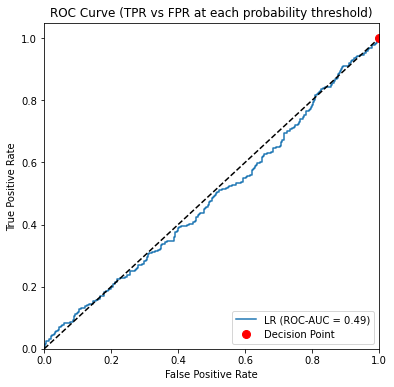

In [276]:
cm = confusion_matrix(y_test, grid.predict(X_test))
fpr, tpr, _ = roc_curve(y_test, grid.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='LR (ROC-AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
tn, fp, fn, tp = [i for i in cm.ravel()]
plt.plot(fp/(fp+tn), tp/(tp+fn), 'ro', markersize=8, label='Decision Point')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (TPR vs FPR at each probability threshold)')
plt.legend(loc="lower right")
plt.show()

### 2- Confusion Matrix

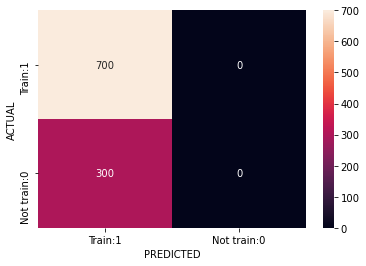


               precision    recall  f1-score   support

           0       0.00      0.00      0.00       300
           1       0.70      1.00      0.82       700

    accuracy                           0.70      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.49      0.70      0.58      1000



In [281]:
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted, [1,0])
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ["Train:1", "Not train:0"] , 
                yticklabels = ["Train:1", "Not train:0"] )
    plt.ylabel('ACTUAL')
    plt.xlabel('PREDICTED')
    plt.show()
draw_cm( y_test, grid.predict(X_test) )
print('\n',classification_report(y_test, grid.predict(X_test)))

I used ROC Curve and confusion matrix to decide whether train and test data are from same population or not. Area under the 
ROC curve is 0.49 and it demonstrates that the model is insufficient for accurate classification. Also, according to confusion 
matrix, model pretends that all values are from train dataset because of the similarity of train and test data. As a result,
our test and train data are from same population. 

# Q3. Mixed data for Naive Bayes (40 pts)

Given the following attributes:

In [924]:
import numpy as np
import pandas as pd
df = pd.DataFrame({
    'temperature':[98,87,90,86,88,79,85,89,80,90,86,83,70,68,64,69,75,75,72,81,73,68,75,76,79,77],
    'humidity'   :[85,79,91,83,87,80,86,85,87,90,83,76,88,80,65,70,80,70,90,75,74,67,73,74,77,78],
    'playtennis' :['no','no','no','no','no','no','no','no','no','no','no','yes','yes','yes','yes',
                   'yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes']},
    columns=['temperature', 'humidity', 'playtennis'])

The target is whether we'll play tennis given the values of temperature and humidity. The objective here is come up with a model to predict whether we shall play if **temperature=79** and **humidity=81**.

**1.** Build a Logistic Regression and a Naive Bayes model to compare the predicitons for the temperature and humidity value given above. Given the small size of our training data, you should use an **appropriate Cross-validation technique** to select a Logistic Regression model.

**2.** Transform the temperature feature (which is a continuous attribute) into a categorical one. Use the following table for this purpose:<br>

|Range|Value|
|----|-----|
|temp $\lt$ 75| Low|
|75 $\lt$ temp $\le$ 85| Medium|
|temp $\gt$ 85| High|

Now you have mixed data. Build a Naive Bayes model that can handle both features and make a prediction for (temperature=medium, humidity=81) where medium is selected for temperature =79.

One way of handling mixed data is to independently fit a GaussianNB model on the continuous part of the data and a CategoricalNB (see below for reference) model on the categorical part. 

Once you fit each model using relevant attributes, you can compute the class probabilities (for both yes and no) for both of these models by using the `predict_proba` method. These probabilities are 2D arrays for "**no/0**" and "**yes/1**" classes. By taking either one of these class assignment probabilities (say probability values for 1) for both models, you can use these as new features for continuous and categorical atributes. You can put these together by using either `numpy.c_` or `numpy.hstack` modules. Now you have continuous attributes for your data.  

Finally, you can refit a new GaussianNB model on these new features (along with the target) and make your predictions. The input for this new model will be the probabilities for "temperature=medium" and "humidity=81" which will be the predictions of the separate models built in the previous step.

Reference for Categorical NB: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html

#### Answer 3.1

In [757]:
#Replacing "yes" and "no" values to 1 and 0 
df['playtennis'] = df['playtennis'].map({'yes' : 1, 'no' : 0})

In [758]:
df.head()

,temperature,humidity,playtennis
0,98,85,0
1,87,79,0
2,90,91,0
3,86,83,0
4,88,87,0


In [759]:
df.shape

(26, 3)

In [760]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   temperature  26 non-null     int64
 1   humidity     26 non-null     int64
 2   playtennis   26 non-null     int64
dtypes: int64(3)
memory usage: 752.0 bytes


### 1- Building the Model with Logistic Regression 

In [761]:
y = df.playtennis
columns = ['temperature', 'humidity'] 
X = df[columns]

In [762]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [764]:
# Due to the suitability of small datasets, I decide to implement leave-one-out cross validation

pipe = Pipeline([  ('scaler',  StandardScaler()),
                 ('clf',     LogisticRegression(random_state=42))])

params = [{'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga']},
          
          {'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l2'], 
           'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}]

loocv = model_selection.LeaveOneOut()
grid = GridSearchCV(pipe, param_grid=params, cv=loocv, n_jobs=-1 , verbose=1)

grid.fit(X_train, y_train)

print('Best grid parameters:', grid.best_params_, '\n')
print('Classifier used     :',grid.best_estimator_,'\n')
print('Training accuracy:', grid.score(X_train, y_train))
print('Test accuracy:', grid.score(X_test, y_test))

Fitting 19 folds for each of 266 candidates, totalling 5054 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:    7.7s


Best grid parameters: {'clf__C': 0.15000000000000002, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'} 

Classifier used     : Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(C=0.15000000000000002, penalty='l1',
                                    random_state=42, solver='liblinear'))]) 

Training accuracy: 0.9473684210526315
Test accuracy: 0.7142857142857143


[Parallel(n_jobs=-1)]: Done 5054 out of 5054 | elapsed:   16.7s finished


##### Predicting whether we shall play if temperature= 79 and humidity= 81

In [765]:
grid.predict_proba([[79, 81]]) 

array([[0.50541185, 0.49458815]])

### 2 - Building the Model with Naive Bayes 

In [766]:
pipeline = Pipeline([('transformer', PowerTransformer()),
                     ('clf', GaussianNB()) ])

params = [{'clf__var_smoothing': np.logspace(0,-9, num=100)}]

loocv = model_selection.LeaveOneOut()
grid = GridSearchCV(estimator = pipeline, param_grid = params, cv = loocv,n_jobs=-1 , verbose=1)

grid.fit(X_train, y_train)
print('Best grid parameters:', grid.best_params_, '\n')
print('Classifier used     :',grid.best_estimator_,'\n')
print('Training accuracy:', grid.score(X_train, y_train))
print('Test accuracy:', grid.score(X_test, y_test))

Fitting 19 folds for each of 100 candidates, totalling 1900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    3.6s


Best grid parameters: {'clf__var_smoothing': 1.0} 

Classifier used     : Pipeline(steps=[('transformer', PowerTransformer()),
                ('clf', GaussianNB(var_smoothing=1.0))]) 

Training accuracy: 0.9473684210526315
Test accuracy: 0.8571428571428571


[Parallel(n_jobs=-1)]: Done 1900 out of 1900 | elapsed:    5.7s finished


##### Predicting whether we shall play if temperature=79 and humidity=81

In [767]:
grid.predict_proba([[79, 81]]) 

array([[0.47644818, 0.52355182]])

Test accuracy of Naive Bayes is higher than test accuracy of logistic regression. Also, according to result, if the temperature
is equal to 79 and humidity is equal to 81, tennis will be played.

#### Answer 3.2

In [925]:
df_new = df.copy() 

In [926]:
df_new['cat_temp'] = ["Low" if (x < 75) else "Medium" if (x>=75 and x <=85) else "High" for x in df_new.temperature]

In [927]:
df_new.sample(10) 

,temperature,humidity,playtennis,cat_temp
14,64,65,yes,Low
17,75,70,yes,Medium
18,72,90,yes,Low
7,89,85,no,High
0,98,85,no,High
21,68,67,yes,Low
10,86,83,no,High
4,88,87,no,High
20,73,74,yes,Low
3,86,83,no,High


In [928]:
df_g= df_new[['humidity']]    #continuous values 
df_cat =df_new[['cat_temp']]  #categorical values
y=df_new['playtennis'].values

In [929]:
#Encoding categorical variables
enc = OrdinalEncoder()
df_cat = enc.fit_transform(df_cat)

In [930]:
#Creating one array
X=np.c_[df_g, df_cat]

In [931]:
#Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Building Gaussian NB and Categorical NB Model 

In [932]:
#Gaussian Model 
gaus_model = GaussianNB()
clf_G = gaus_model.fit(X_train[:,0:1], y_train)

#Categorical Model 
cat_model = CategoricalNB()
clf_C = cat_model.fit(X_train[:,1:2], y_train)

In [933]:
#Finding probability predictions for train and test data 
G_prob = gaus_model.predict_proba(X_train[:,0:1])
Cat_prob = cat_model.predict_proba(X_train[:,1:2])

G_test_prob = gaus_model.predict_proba(X_test[:,0:1])
Cat_test_prob = cat_model.predict_proba(X_test[:,1:2])

In [934]:
# Probability prediction for class=1 and into a 2D array
X_new_train = np.c_[(G_prob[:,1], Cat_prob[:,1])]
X_new_test = np.c_[(G_test_prob[:,1], Cat_test_prob[:,1])]

### Building Gaussian NB Model 

In [935]:
model = GaussianNB()
clf = model.fit(X_new_train, y_train) 
label_pred = model.predict(X_new_test) 
print('Classes: ', clf.classes_) 
print('Class Priors: ',clf.class_prior_) 
score = model.score(X_new_test, y_test)
print('Accuracy Score: ', score)
print(classification_report(y_test,label_pred)) 

Classes:  ['no' 'yes']
Class Priors:  [0.45 0.55]
Accuracy Score:  0.8333333333333334
              precision    recall  f1-score   support

          no       1.00      0.50      0.67         2
         yes       0.80      1.00      0.89         4

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



##### Predicting whether we shall play if temperature=medium and humidity=81

In [936]:
#Creating new dataframe 
df_pred = pd.DataFrame({'temperature': 'Medium',
                         'humidity' : [81]})

In [937]:
df_pred

,temperature,humidity
0,Medium,81


In [938]:
X_Gaus = df_pred[['humidity']] 
X_Cat = df_pred[['temperature']]

In [939]:
#Encoding the variables 
X_Cat = enc.transform(X_Cat)

In [940]:
#Combining in one array 
X_array = np.c_[X_Gaus, X_Cat[:, 0]]

In [941]:
label_pred1 = model.predict(X_array)
label_pred1[0]

'yes'

In [942]:
model.predict_proba(X_array)

array([[0., 1.]])

According to result, if the temperature is medium and humidity is equal to 81, tennis will be played.